In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df_sample = pd.read_csv('/content/dataset_sdn.csv')

In [3]:

X = df_sample.drop('label', axis=1)
y = df_sample['label']


In [4]:

numeric_cols = [col for col in X.columns if col not in ['src', 'dst', 'Protocol']]
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])

In [5]:
categorical_cols = ['src', 'dst', 'Protocol']

numeric_transformer = StandardScaler()


In [7]:

categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
X_categorical = categorical_transformer.fit_transform(X[categorical_cols])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

In [8]:
fnn_model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_transformed.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

X_train_fnn, X_test_fnn, y_train_fnn, y_test_fnn = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

fnn_model.fit(X_train_fnn, y_train_fnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)



Epoch 1/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9054 - loss: 0.2145 - val_accuracy: 0.9808 - val_loss: 0.0513
Epoch 2/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9839 - loss: 0.0435 - val_accuracy: 0.9890 - val_loss: 0.0323
Epoch 3/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0270 - val_accuracy: 0.9916 - val_loss: 0.0239
Epoch 4/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9919 - loss: 0.0238 - val_accuracy: 0.9925 - val_loss: 0.0202
Epoch 5/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9929 - loss: 0.0188 - val_accuracy: 0.9910 - val_loss: 0.0212
Epoch 6/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9939 - loss: 0.0151 - val_accuracy: 0.9952 - val_loss: 0.0140
Epoch 7/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9952 - loss: 0.0127 - val_accuracy: 0.9958 - val_loss: 0.0124
Epoch 8/10
2348/2348 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9960 - loss: 0.0110 -

653/653 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
FNN Accuracy: 0.9956394652355168
FNN F1 Score: 0.9944188899110702
FNN Confusion Matrix:


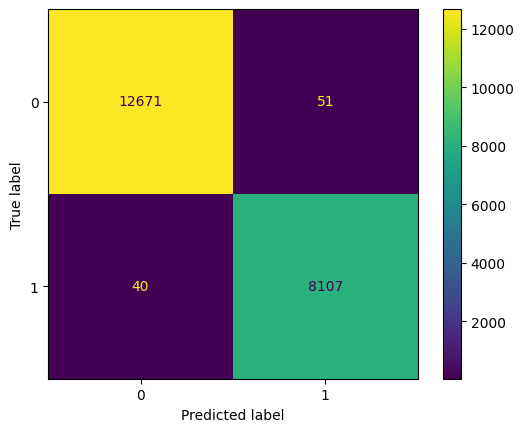

In [10]:
if y_test_fnn.isnull().any():
    print("NaN values found in y_test_fnn. Handle missing labels before evaluating the model.")
else:
    y_pred_fnn = fnn_model.predict(X_test_fnn)
    y_pred_fnn_binary = (y_pred_fnn > 0.5).astype(int)

    accuracy_fnn = accuracy_score(y_test_fnn, y_pred_fnn_binary)
    f1_fnn = f1_score(y_test_fnn, y_pred_fnn_binary)
    conf_matrix_fnn = confusion_matrix(y_test_fnn, y_pred_fnn_binary)

    print(f'FNN Accuracy: {accuracy_fnn}')
    print(f'FNN F1 Score: {f1_fnn}')
    print('FNN Confusion Matrix:')
    ConfusionMatrixDisplay(conf_matrix_fnn).plot(cmap='viridis', values_format='d')